<a href="https://colab.research.google.com/github/Hami-611/21Days_AI-ML_Challenge/blob/main/Day_10_Creative_AI_Generating_Art_with_Neural_Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment:

## - Load the pretrainde Generator
## - Load Gender Vector
## - Generate 10 variations of the image from male to female as per gender vector

## Load the pretrainde Generator

In [58]:
#clone the repo
!git clone https://github.com/AshishJangra27/Face-Generator-with-GAN

Cloning into 'Face-Generator-with-GAN'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 34 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 160.27 MiB | 15.63 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Updating files: 100% (10/10), done.


In [59]:
# Extract the generator file from the cloned repository
import os
os.chdir('Face-Generator-with-GAN')
print(os.listdir())

['generator_600.h5', 'generator_200.h5', 'README.md', 'generator_300.h5', 'face-generator-with-gan.ipynb', 'Face_Generators.ipynb', 'generator_500.h5', 'generator_700.h5', '.git', 'generator_400.h5', 'generator_100.h5']


## Load the Gender Vector

In [60]:
!git clone https://github.com/AshishJangra27/Gender-Style-Transfer

Cloning into 'Gender-Style-Transfer'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 20 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 18.87 MiB | 13.81 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [62]:

!git clone https://github.com/AshishJangra27/Gender-Style-Transfer /content/Gender-Style-Transfer


fatal: destination path '/content/Gender-Style-Transfer' already exists and is not an empty directory.


In [63]:
import os

os.chdir('/content/')
print(os.listdir())

['.config', 'Gender-Style-Transfer', 'Face-Generator-with-GAN', 'sample_data']


## Load the generator model

In [64]:
#import libraries
import tensorflow as tf
import os

# Change directory to where the generator model is located
os.chdir('/content/Face-Generator-with-GAN')

# Load the pre-trained generator model.
# The warning "No training configuration found" is expected as we are only loading the weights for inference.
generator_model = tf.keras.models.load_model('generator_700.h5')

# Change back to the content directory
os.chdir('/content/')

In [65]:
import numpy as np
import os

os.chdir('/content/Gender-Style-Transfer')
gender_vector = np.load('gender_vec.npy')

##  Generate 10 variations of the image from male to female as per gender vector

In [73]:
latent_vector = np.random.normal(size=(1, 100))
print(latent_vector.shape)

(1, 100)


In [80]:
gender_vectors_list = [2.5, 2, 1.5, 1, 0.5, 0, -0.5, -1, -1.5, -2]

In [81]:
generated_images = []
# Iterate through the list of scaling factors for the gender vector
for scaling_factor in gender_vectors_list:
  # Create a modified latent vector by adding the scaled gender vector
  # Ensure the dimensions are compatible for addition.
  # latent_vector now has shape (1, 100), gender_vector has shape (1, 512).
  # Slice gender_vector to match the latent_vector's dimension (100) for addition.
  modified_gender_vector_slice = gender_vector[:, :latent_vector.shape[1]] # This will now slice to (1, 100)
  modified_latent_vector = latent_vector + scaling_factor * modified_gender_vector_slice

  # Generate the image using the generator model
  generated_image = generator_model.predict(modified_latent_vector)
  generated_images.append(generated_image)

# Convert the list of images to a numpy array for easier handling
generated_images = np.array(generated_images)

# The generated images are likely in the range [-1, 1]. They will be normalized later for visualization.

print(generated_images.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
(10, 1, 128, 128, 3)


## Visualize

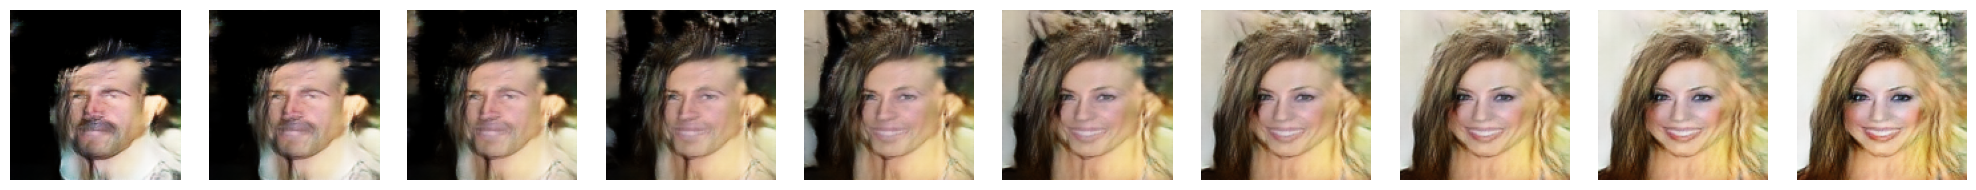

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming generated_images is a numpy array of shape (10, 1, 128, 128, 3)
# We need to reshape it to (10, 128, 128, 3) for matplotlib
generated_images_reshaped = np.squeeze(generated_images, axis=1)


# The generated images are likely in the range [-1, 1]. Normalize to [0, 1] for display.
generated_images_normalized = (generated_images_reshaped + 1) / 2.0


# Create a figure and a set of subplots
fig, axes = plt.subplots(1, len(generated_images_normalized), figsize=(20, 2))

# Iterate through the generated images and display each one
for i, img in enumerate(generated_images_normalized):
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide the axes

plt.tight_layout()
plt.show()

## Project Summary

This project demonstrates how to use a pre-trained Generative Adversarial Network (GAN) and a gender style transfer vector to generate a sequence of images that show a gradual transition in gender.

1.  **Loading the Generator Model:** A pre-trained GAN model, capable of generating realistic human faces from latent vectors, is loaded.
2.  **Loading the Gender Vector:** A pre-trained gender style transfer vector is loaded. This vector represents the direction in the latent space that corresponds to the change in gender.
3.  **Generating Variations:** By adding scaled versions of the gender vector to a random latent vector and feeding these modified vectors into the generator model, a series of images are produced, showing a progression from one gender to another.
4.  **Visualization:** The generated images are displayed using Matplotlib, showcasing the effect of applying the gender style transfer vector.